In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# print(imdb.get_word_index())
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_view = ' '.join(
    reverse_word_index.get(i-3, '?') for i in train_data[0]
    # '?' 는 key값이 없을 때 default값으로 설정된 값.
)
print(decoded_view)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for idx, sequence in enumerate(sequences):
    result[idx, sequence] = 1.
  return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train_sub = np.asarray(train_labels, dtype=np.float32)

for i in range(len(y_train)):
  if y_train[i] != y_train_sub[i]:
    print('NO!!')

print(y_train)
print(y_train_sub)

# is 는 변수가 같은 객체
# == 은 변수가 같은 값을 가질때

[1. 0. 0. ... 0. 1. 0.]
[1. 0. 0. ... 0. 1. 0.]


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5481 - acc: 0.7773 - val_loss: 0.4195 - val_acc: 0.8520
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3366 - acc: 0.8985 - val_loss: 0.3239 - val_acc: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2427 - acc: 0.9244 - val_loss: 0.3068 - val_acc: 0.8763
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1914 - acc: 0.9397 - val_loss: 0.2834 - val_acc: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1565 - acc: 0.9509 - val_loss: 0.2762 - val_acc: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1272 - acc: 0.9624 - val_loss: 0.2881 - val_acc: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1082 - acc: 0.9679 - val_loss: 0.2983 - val_acc: 0.8852
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0898 - a

In [11]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


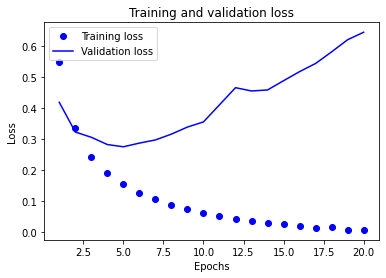

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, 1+len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

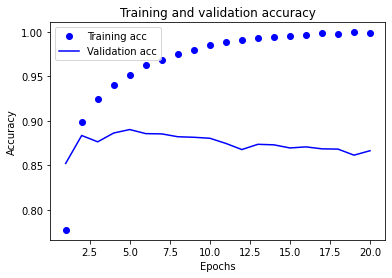

In [13]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
# 모델 처음부터 다시 훈련
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 4s 75ms/step - loss: 0.4262 - accuracy: 0.8179
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2467 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1918 - accuracy: 0.9307
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1613 - accuracy: 0.9412


In [15]:
results = model.predict(x_test, y_test)

ValueError: ignored

In [ ]:
results

In [ ]:
print(model.predict(x_test))
print(x_test)

In [16]:
# 실험 test
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics='acc'
)
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 51ms/step - loss: 0.1698 - acc: 0.7642 - val_loss: 0.1125 - val_acc: 0.8587
Epoch 2/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0806 - acc: 0.9042 - val_loss: 0.0924 - val_acc: 0.8758
Epoch 3/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0566 - acc: 0.9311 - val_loss: 0.0873 - val_acc: 0.8820
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0408 - acc: 0.9507 - val_loss: 0.0933 - val_acc: 0.8770
Epoch 5/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0335 - acc: 0.9607 - val_loss: 0.1091 - val_acc: 0.8561
Epoch 6/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0233 - acc: 0.9740 - val_loss: 0.0900 - val_acc: 0.8803
Epoch 7/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0206 - acc: 0.9785 - val_loss: 0.0921 - val_acc: 0.8810
Epoch 8/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0164 - a

In [17]:
results_eval = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1175 - acc: 0.8536


In [ ]:
print(results_eval)

In [18]:
print(history.history)

{'loss': [0.16978365182876587, 0.08060921728610992, 0.05663742497563362, 0.04084700345993042, 0.03350227698683739, 0.023279238492250443, 0.020605385303497314, 0.016390899196267128, 0.013061635196208954, 0.008122149854898453], 'acc': [0.76419997215271, 0.90420001745224, 0.9310666918754578, 0.9506666660308838, 0.9607333540916443, 0.9739999771118164, 0.9785333275794983, 0.9823333621025085, 0.9854666590690613, 0.9916666746139526], 'val_loss': [0.11254341900348663, 0.09238587319850922, 0.08731123059988022, 0.09334950894117355, 0.10905013233423233, 0.08999882638454437, 0.09213430434465408, 0.09532781690359116, 0.09711643308401108, 0.10879328846931458], 'val_acc': [0.8586999773979187, 0.8758000135421753, 0.8820000290870667, 0.8769999742507935, 0.8561000227928162, 0.880299985408783, 0.8809999823570251, 0.8780999779701233, 0.875, 0.866599977016449]}


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


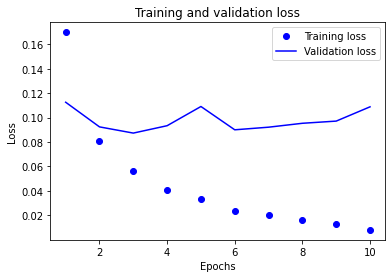

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())
loss = history_dict['loss']
acc = history_dict['acc']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

epochs = range(1, 1+len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()